In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE

In [56]:
agriculture = pd.read_csv('Agriculture_dataset.csv')

In [57]:
agriculture.head()

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Soil_Type,Season
0,F001,Cotton,329.40,Sprinkler,8.14,2.21,14.44,76648.20,Loamy,Kharif
1,F002,Carrot,18.67,Manual,4.77,4.36,42.91,68725.54,Peaty,Kharif
2,F003,Sugarcane,306.03,Flood,2.91,0.56,33.44,75538.56,Silty,Kharif
3,F004,Tomato,380.21,Rain-fed,3.32,4.35,34.08,45401.23,Silty,Zaid
4,F005,Tomato,135.56,Sprinkler,8.33,4.48,43.28,93718.69,Clay,Zaid


In [58]:
agriculture.tail()

,Farm_ID,Crop_Type,Farm_Area(acres),Irrigation_Type,Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters),Soil_Type,Season
45,F046,Carrot,112.80,Sprinkler,1.80,1.01,31.57,79966.10,Clay,Kharif
46,F047,Potato,347.66,Drip,3.86,2.68,31.47,86989.88,Sandy,Kharif
47,F048,Potato,77.39,Sprinkler,9.34,3.00,20.53,5874.17,Silty,Zaid
48,F049,Barley,462.37,Sprinkler,2.30,0.14,39.51,53879.87,Clay,Kharif
49,F050,Tomato,292.25,Rain-fed,4.08,0.76,45.14,90232.08,Silty,Kharif


In [59]:
agriculture.drop(columns=["Farm_ID"], inplace=True)

In [60]:
agriculture.isnull().sum()

Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Water_Usage(cubic meters)    0
Soil_Type                    0
Season                       0
dtype: int64

In [61]:
agriculture.shape

(50, 9)

In [62]:
agriculture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Crop_Type                  50 non-null     object 
 1   Farm_Area(acres)           50 non-null     float64
 2   Irrigation_Type            50 non-null     object 
 3   Fertilizer_Used(tons)      50 non-null     float64
 4   Pesticide_Used(kg)         50 non-null     float64
 5   Yield(tons)                50 non-null     float64
 6   Water_Usage(cubic meters)  50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
dtypes: float64(5), object(4)
memory usage: 3.6+ KB


In [63]:
agriculture.duplicated().sum()

0

In [64]:
agriculture.describe()

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,254.963800,4.905400,2.398000,27.059200,56724.295600
std,139.417782,2.732689,1.438613,13.345789,27264.992053
min,12.500000,0.500000,0.140000,3.860000,5869.750000
25%,135.710000,2.437500,0.972500,16.190000,37818.152500
50%,281.980000,5.045000,2.330000,28.970000,54097.075000
75%,368.107500,6.885000,3.417500,37.860000,82240.032500
max,483.880000,9.960000,4.990000,48.020000,94754.730000


In [65]:
#In this agriculture dataset has no outliers

In [66]:
x = agriculture.drop('Yield(tons)', axis=1)
y = agriculture['Yield(tons)']

In [67]:
x = pd.get_dummies(x, drop_first=True)

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
cross_val_score = model.score(x_test, y_test)
cross_val_score

-0.2266227855326879

In [71]:
# prediction
y_pred = model.predict(x_test)
y_pred

array([21.75366195, 20.94049254, 12.59706957, 26.90688288, 20.88202819,
       23.4964025 ,  6.20047099, 11.69368244, 34.16949549, 37.08269576])

In [72]:
model.intercept_

2.9666755283633357

In [73]:
model.coef_

array([ 1.32727703e-02,  1.87091615e+00, -2.17449938e-01,  1.33766035e-04,
        5.68543068e+00, -1.33648769e+01, -3.27805742e+00, -9.58750634e+00,
       -3.47774318e+00, -5.08251425e+00,  8.28531742e+00,  1.16015660e+00,
       -3.23928992e+00, -1.09354810e+01,  1.41715762e+01,  6.45430238e+00,
        2.91283545e+00, -5.62916100e+00, -7.08940126e+00,  1.20190731e+01,
        6.86182086e+00,  7.15146131e+00,  4.00855347e+00])

In [74]:
r_squared = r2_score(y_test, y_pred) 
r_squared

-0.2266227855326879

In [75]:
MSE = mean_squared_error(y_test, y_pred)
MSE

195.86975627311176

In [76]:
RMSE = np.sqrt(MSE)
RMSE

13.995347665317635

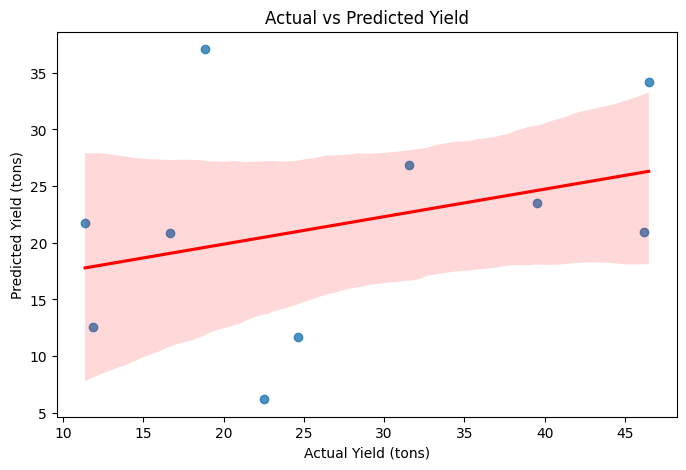

In [77]:
plt.figure(figsize=(8, 5))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Yield (tons)")
plt.ylabel("Predicted Yield (tons)")
plt.title("Actual vs Predicted Yield")
plt.show()


In [78]:
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions.head())

    Actual  Predicted
13   11.38  21.753662
39   46.19  20.940493
30   11.86  12.597070
45   31.57  26.906883
17   16.67  20.882028
